In [1]:
import matplotlib.pyplot as plt
import numpy as np
import gaussianfunctions as gauss
from sklearn.mixture import GaussianMixture
import pandas as pd

In [2]:
def EMGMM(X,initial_param):
    n_components=gauss.BIC_gmm(X)
    em=gauss.GaussianEM(X,n_components,initial_param)
    return(em)

In [3]:
B=pd.read_csv('/Users/devitahalim/SCIE30001_Project/GMM/locusRatioFrame.csv')

### KIR2DL3

50


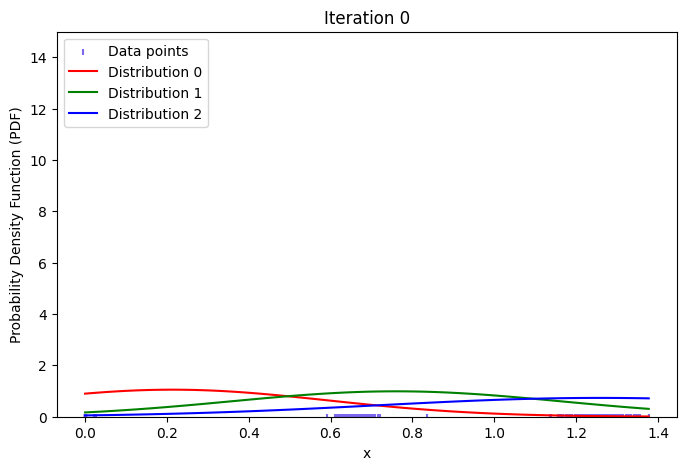

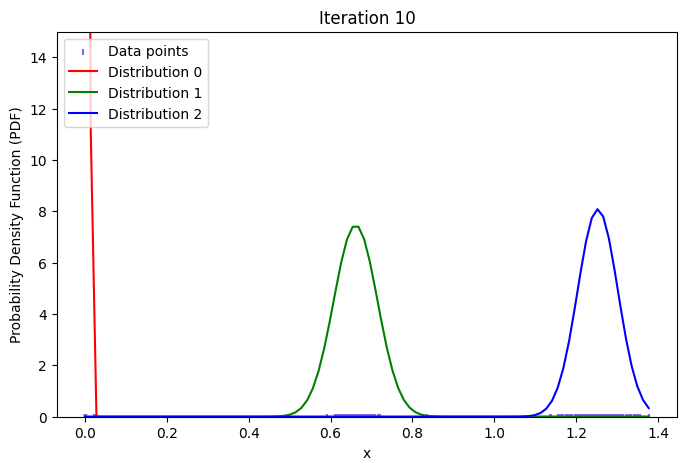

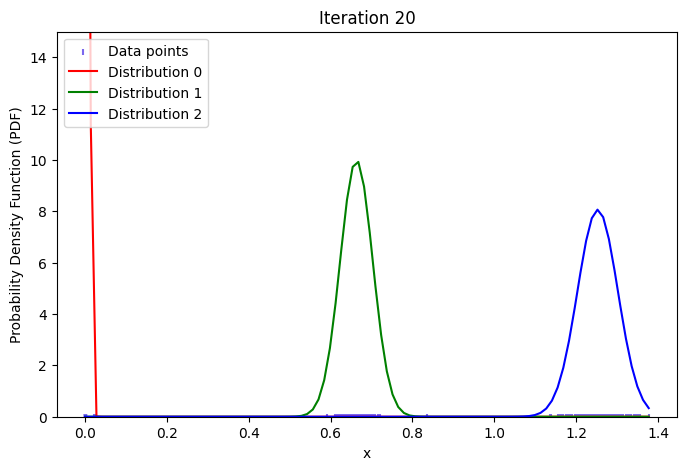

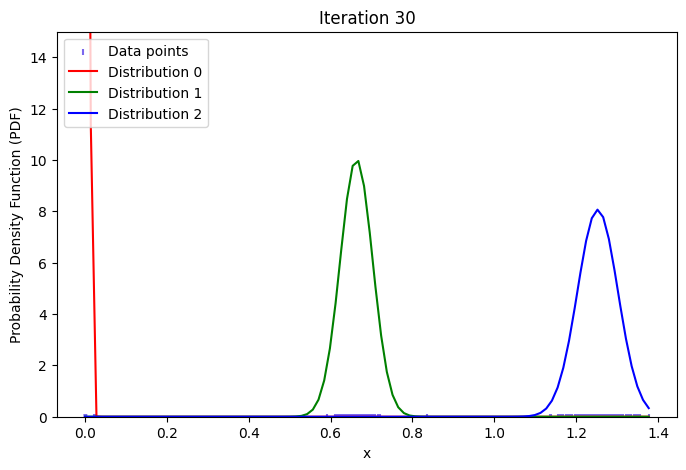

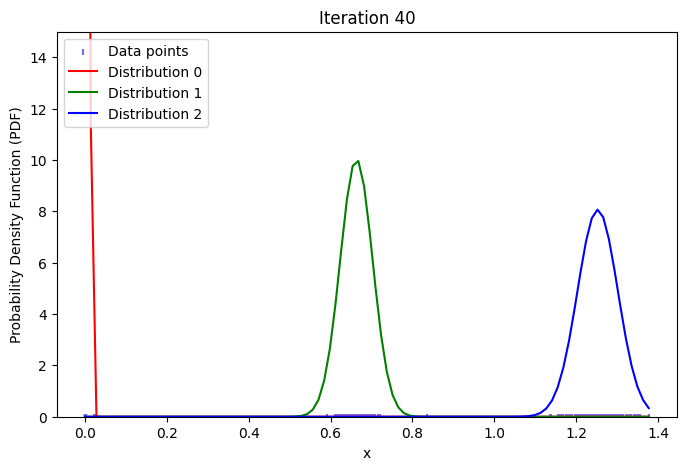

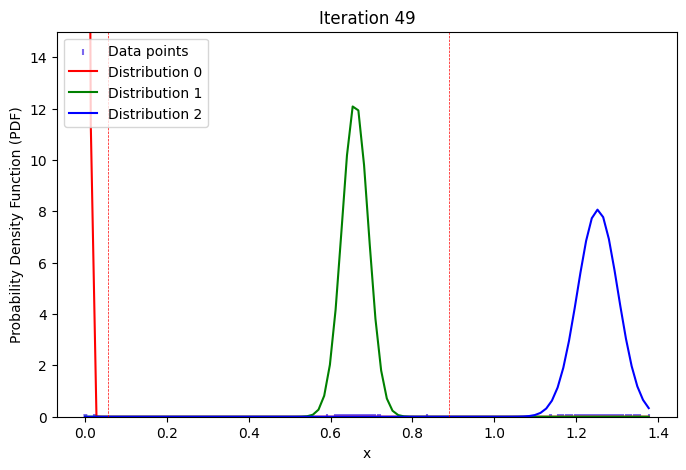

In [5]:
KIR2DL3_data=B['KIR2DL3'].to_numpy()

X=KIR2DL3_data

# Initial Parameters
a=({
    'Mean':0,
    'Variance':0.1,
    'Weight':1/3
},{
    'Mean':0.5,
    'Variance':0.1,
    'Weight':1/3
},{
    'Mean':1.8,
    'Variance':0.1,
    'Weight':1/3
})
em=EMGMM(X,a)
print(len(em))
t=gauss.findThreshold(X,gauss.BIC_gmm(X),em)
gauss.PlotGMM(X,em,10,t)

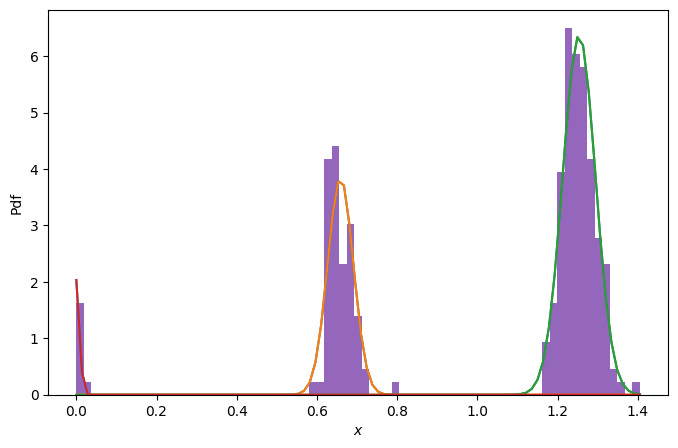

In [86]:
X=X.reshape(-1,1)
gm=GaussianMixture().fit(X)
N = np.arange(1, 11)
models = [None for i in range(len(N))]

for i in range(len(N)):
    models[i] = GaussianMixture(N[i]).fit(X)

# compute the AIC and the BIC
AIC = [m.aic(X) for m in models]
BIC = [m.bic(X) for m in models]

plt.figure(figsize=(8,5))
M_best_BIC=models[np.argmin(BIC)]
M_best_AIC=models[np.argmin(AIC)]

b=np.linspace(np.min(X),np.max(X),100)

log_prob1=M_best_BIC.score_samples(b.reshape(-1,1))
log_prob2=M_best_AIC.score_samples(b.reshape(-1,1))

resp1=M_best_BIC.predict_proba(b.reshape(-1,1))
resp2=M_best_AIC.predict_proba(b.reshape(-1,1))

pdf1=np.exp(log_prob1)
pdf2=np.exp(log_prob2)
pdf_individual = resp1 * pdf1[:, np.newaxis]

# plt.plot(b,pdf1)
plt.plot(b,pdf1)
plt.plot(b,pdf_individual)
plt.hist(X,bins=75, density=True)

plt.xlabel("$x$")
plt.ylabel("Pdf")

plt.show()

In [145]:

# X = gauss.SimulateGMM(100,1,4,30,2)
X=X.reshape(-1,1)

N = np.arange(1, 11)

models = [None for i in range(len(N))]
for i in range(len(N)):
    models[i] = GaussianMixture(N[i]).fit(X)

# compute the BIC
BIC = [m.bic(X) for m in models]

M_best_BIC=models[np.argmin(BIC)]

gm=M_best_BIC.fit(X)
print(gm.means_,gm.covariances_,em[-1])

[[1.22921448]
 [0.00251858]
 [0.6585849 ]
 [1.27670325]] [[[7.66214162e-04]]

 [[3.96880802e-05]]

 [[1.02627074e-03]]

 [[1.47189934e-03]]] [{'Mean': 0.0016088249139312816, 'Variance': 2.689487728062935e-06, 'Weight': 0.11739157738270392}, {'Mean': 0.6648781136683595, 'Variance': 0.001805412319358544, 'Weight': 0.32173969278841347}, {'Mean': 1.2601006873822636, 'Variance': 0.006934625506672413, 'Weight': 0.5608713291372025}]


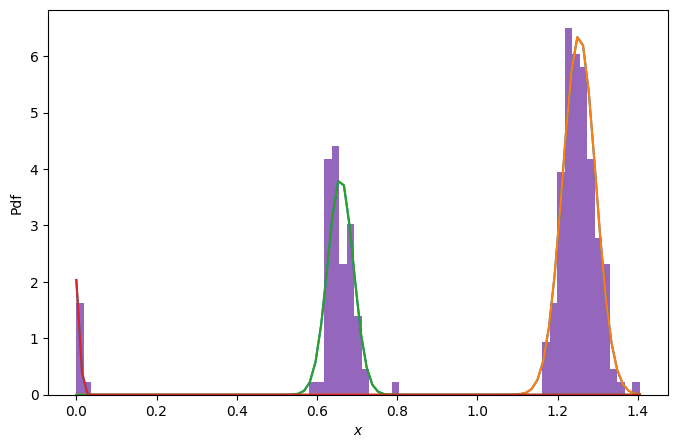

In [34]:
plt.figure(figsize=(8,5))

b=np.linspace(np.min(X),np.max(X),100)

log_prob1=M_best_BIC.score_samples(b.reshape(-1,1))

resp1=M_best_BIC.predict_proba(b.reshape(-1,1))

pdf1=np.exp(log_prob1)
pdf_individual = resp1 * pdf1[:, np.newaxis]

# plt.plot(b,pdf1)
plt.plot(b,pdf1)
plt.plot(b,pdf_individual)
plt.hist(X,bins=75, density=True)

plt.xlabel("$x$")
plt.ylabel("Pdf")
plt.show()

### KIR2DP1

In [10]:
KIR2DP1_data=B['KIR2DP1'].to_numpy()
initial=({
    'Mean':0.01,
    'Variance':0.01,
    'Weight':1/3
},{
    'Mean':0.5,
    'Variance':0.01,
    'Weight':1/3
},{
    'Mean':2,
    'Variance':0.01,
    'Weight':1/3
})
iter_data_KIR2DP1=EMGMM(KIR2DP1_data,[])

In [11]:
X=KIR2DP1_data.reshape(-1,1)

In [12]:
X=X.reshape(-1,1)

N = np.arange(1, 5)

models = [None for i in range(len(N))]
for i in range(len(N)):
    models[i] = GaussianMixture(N[i]).fit(X)

# compute the BIC
BIC = [m.bic(X) for m in models]

M_best_BIC=models[np.argmin(BIC)]

gm=M_best_BIC.fit(X)
print(gm.means_)
print(gm.covariances_)
print(iter_data_KIR2DP1[-1])

[[0.00251858]
 [1.2533949 ]
 [0.6585849 ]]
[[[3.96880802e-05]]

 [[1.68914190e-03]]

 [[1.02627074e-03]]]
[{'Mean': 0.1062323123133622, 'Variance': 0.07004124680804678, 'Weight': 0.04016898675399033}, {'Mean': 0.6565057233511385, 'Variance': 0.0007246544450363808, 'Weight': 0.3033139515710647}, {'Mean': 1.2533969841889148, 'Variance': 0.001688154858287509, 'Weight': 0.6565210277534098}]


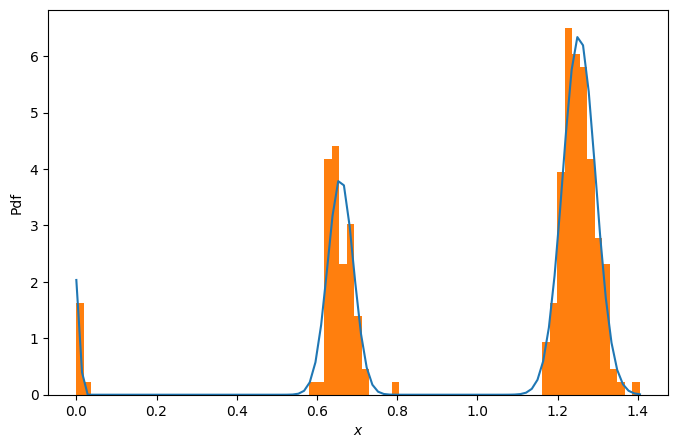

In [13]:
# compute the AIC and the BIC
AIC = [m.aic(X) for m in models]

plt.figure(figsize=(8,5))
M_best_BIC=models[np.argmin(BIC)]
M_best_AIC=models[np.argmin(AIC)]

b=np.linspace(np.min(X),np.max(X),100)

log_prob1=M_best_BIC.score_samples(b.reshape(-1,1))
log_prob2=M_best_AIC.score_samples(b.reshape(-1,1))

resp1=M_best_BIC.predict_proba(b.reshape(-1,1))
resp2=M_best_AIC.predict_proba(b.reshape(-1,1))

pdf1=np.exp(log_prob1)
pdf2=np.exp(log_prob2)
pdf_individual = resp1 * pdf1[:, np.newaxis]

plt.plot(b,pdf1)
# plt.plot(b,pdf_individual)
plt.hist(X,bins=75, density=True)

plt.xlabel("$x$")
plt.ylabel("Pdf")

plt.show()

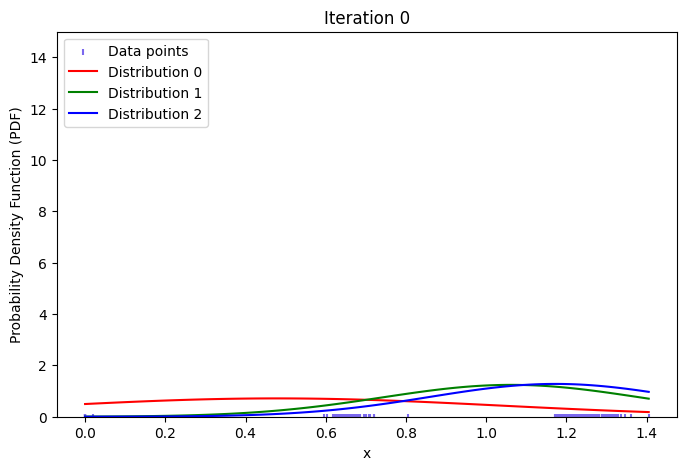

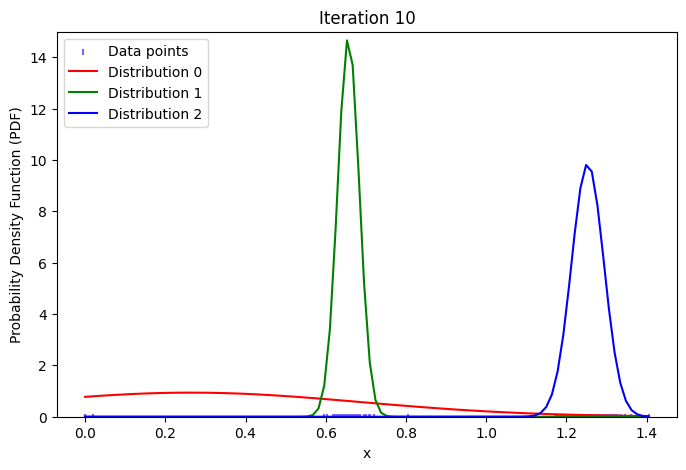

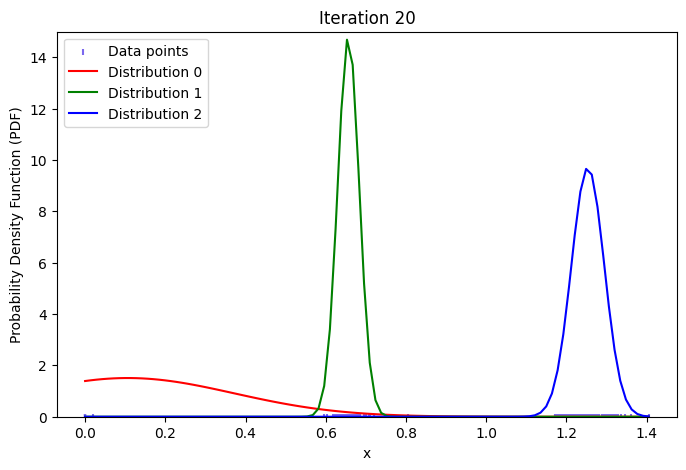

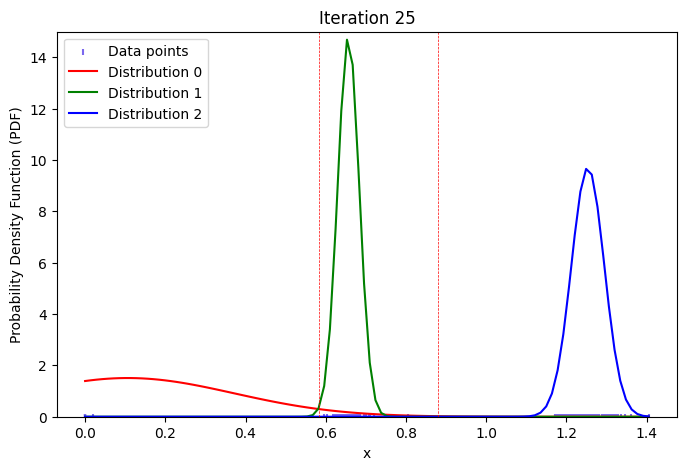

In [15]:
t_KIR2DP1=gauss.findThreshold(KIR2DP1_data,gauss.BIC_gmm(KIR2DP1_data),iter_data_KIR2DP1)
gauss.PlotGMM(X,iter_data_KIR2DP1,10,t_KIR2DP1)

In [16]:
print(t_KIR2DP1)

[0.5819509039400022, 0.880023318153174]


### KIR3DL1

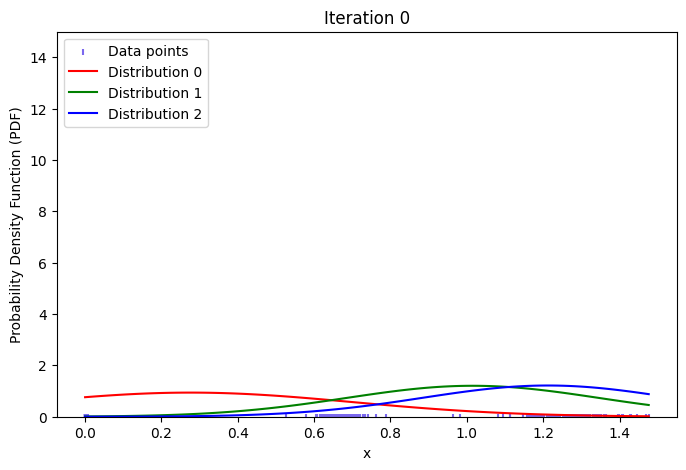

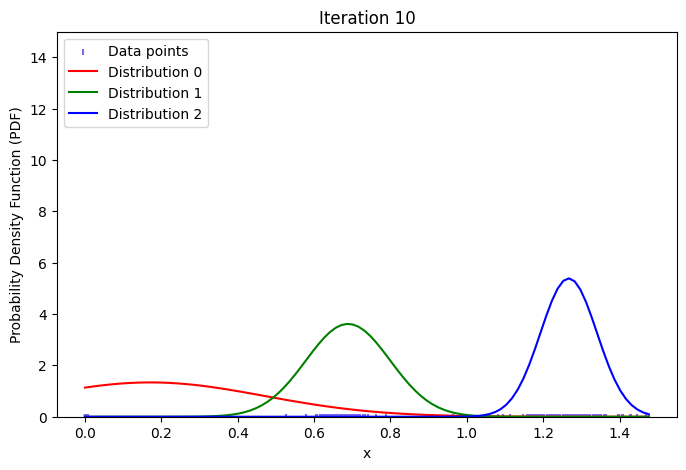

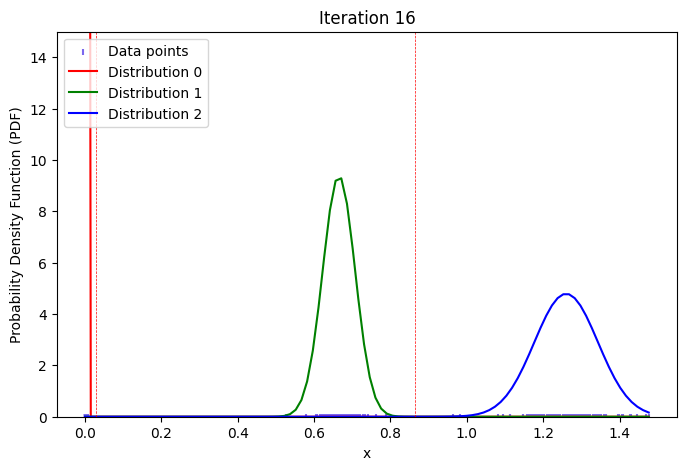

[0.029826126195467272, 0.8649576596685509]

In [23]:
KIR3DL1_data=B['KIR3DL1'].to_numpy()

em=EMGMM(KIR3DL1_data,[])
t=gauss.findThreshold(KIR3DL1_data,gauss.BIC_gmm(KIR3DL1_data),em)
gauss.PlotGMM(KIR3DL1_data,em,10,t)
t

### KIR2DS3

In [4]:
KIR2DS3_data=B["KIR2DS3"].to_numpy()

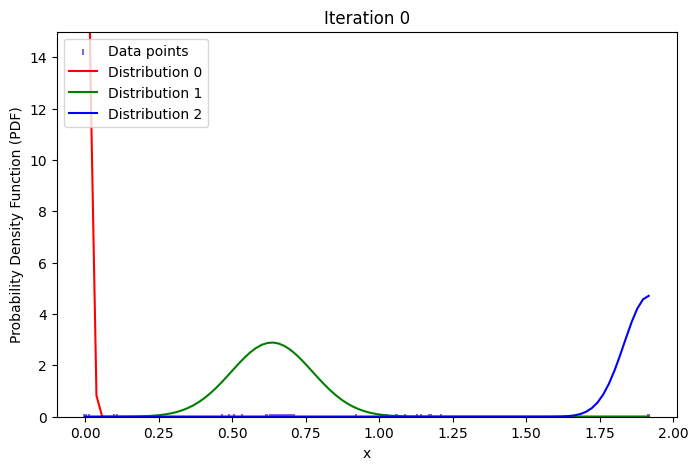

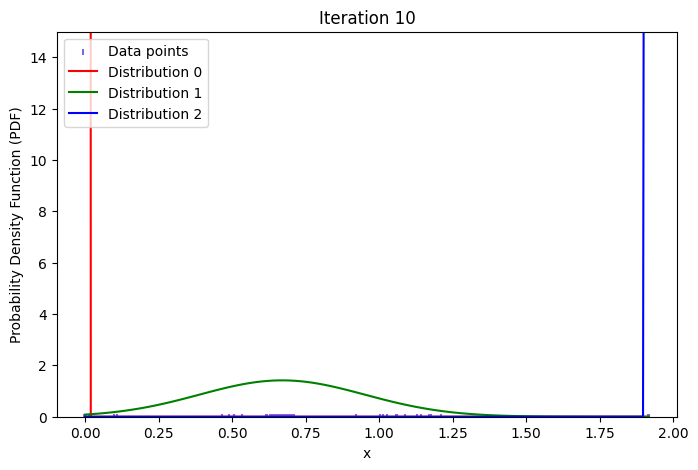

In [7]:
initial=({
    'Mean':0.01,
    'Variance':0.01,
    'Weight':1/3
},{
    'Mean':0.5,
    'Variance':0.01,
    'Weight':1/3
},{
    'Mean':2,
    'Variance':0.01,
    'Weight':1/3
})
iteration_data=EMGMM(KIR2DS3_data,initial)
gauss.PlotGMM(KIR2DS3_data,iteration_data,10)

In [9]:
gauss_nall=[]
for j in range (len(iteration_data[0])):
    gauss_n=[]
    for i in range (len(iteration_data)):
        gaussn=iteration_data[i][j]
        gauss_n.append(gaussn)
    gauss_nall.append(gauss_n)

for i in range(len(iteration_data[0])):
    pd.DataFrame.from_dict(gauss_nall[i]).to_csv("KIR2DS3_{}.csv".format(i))